In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spcqe.quantiles import SmoothPeriodicQuantiles
# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [3]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key='DEMO_KEY')

[============================================================] 100.0% ...queries complete in 7.0 seconds       



In [4]:
data_frame.head()

,SiteID,ac_current,ac_power,ac_voltage,ambient_temp,dc_current,dc_power,dc_voltage,inverter_error_code,inverter_temp,module_temp,poa_irradiance,power_factor,relative_humidity,wind_direction,wind_speed
2011-01-01 00:00:00,34.0,0.0,-200.0,284.0,-3.353332,0.0,-200.0,16.0,0.0,37.0,-7.105555,0.0,0.0,53.513,315.270,0.483250
2011-01-01 00:15:00,34.0,0.0,-300.0,284.0,-3.381110,0.0,-200.0,16.0,0.0,36.0,-6.944444,0.0,0.0,53.581,308.835,0.698724
2011-01-01 00:30:00,34.0,0.0,-300.0,284.0,-3.257777,0.0,-200.0,16.0,0.0,36.0,-6.344444,0.0,0.0,53.413,272.678,0.218156
2011-01-01 00:45:00,34.0,0.0,-200.0,283.0,-3.296666,0.0,0.0,15.0,0.0,36.0,-6.655555,0.0,0.0,52.406,55.913,0.159146
2011-01-01 01:00:00,34.0,0.0,-300.0,284.0,-3.426110,0.0,-200.0,14.0,0.0,35.0,-7.405555,0.0,0.0,53.588,152.145,0.240508


### Running the `DataHandler` processing pipeline

In [5]:
dh = DataHandler(data_frame)

In [6]:
dh.run_pipeline(power_col='ac_power')

0 2.0000000000131027e-06 0.5310284330095024
1 4.000000000000115e-05 0.16427562749091315
2 0.0 0.44178316494399283
0 2.000000000000335e-06 0.5490746200962051
1 4.000000000000115e-05 0.1617652135326363
2 0.0 0.4261637649894113
0 2.00000000000089e-06 0.5653442788666088
1 4.000000000000115e-05 0.1582924237618941
2 0.0 0.4169789664764727
0 2.00000000000089e-06 0.567987030686838
1 4.000000000000115e-05 0.14504882076612272
2 0.0 0.4093524724665757
0 2.00000000000089e-06 0.5693561491487751
1 4.000000000000115e-05 0.12110232838923506
2 0.0 0.4016660711965441
0 2.000000000000335e-06 0.5670003299895492
1 4.000000000000115e-05 0.0959726968056313
2 0.0 0.4025926146475831
0 2.00000000000089e-06 0.5636466123083379
1 4.000000000000115e-05 0.06300540279110144
2 0.0 0.41224282433226767
0 2.000000000000335e-06 0.5564663797520114
1 4.0000000000000105e-05 0.03579107217359771
2 0.0 0.42028113734006856
0 2.00000000000089e-06 0.5502812175029455
1 4.000000000000046e-05 0.030554255037628965
2 0.0 0.428308676199

In [7]:
dh.report()


-----------------
DATA SET REPORT
-----------------
length               4.00 years
capacity estimate    107.10 kW
data sampling        15 minutes
quality score        0.96
clearness score      0.55
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


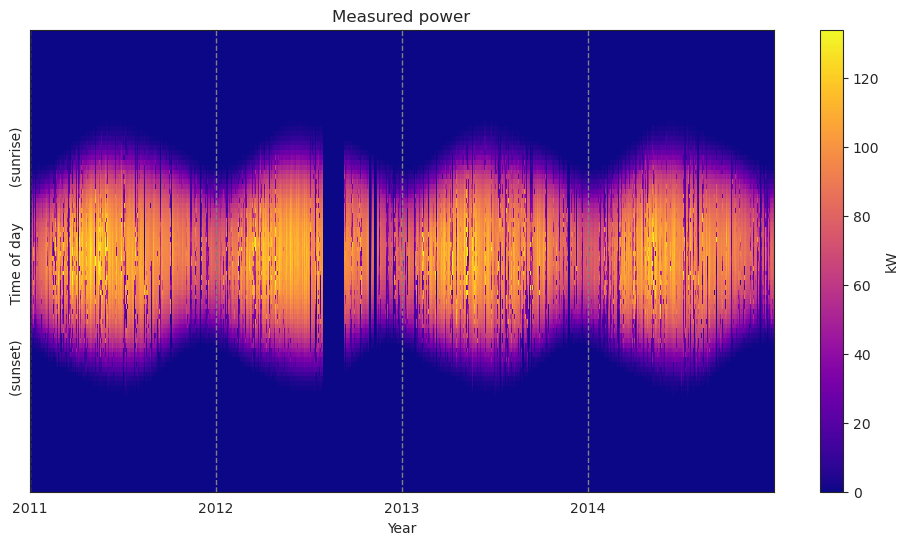

In [10]:
dh.plot_heatmap('filled');

<Axes: >

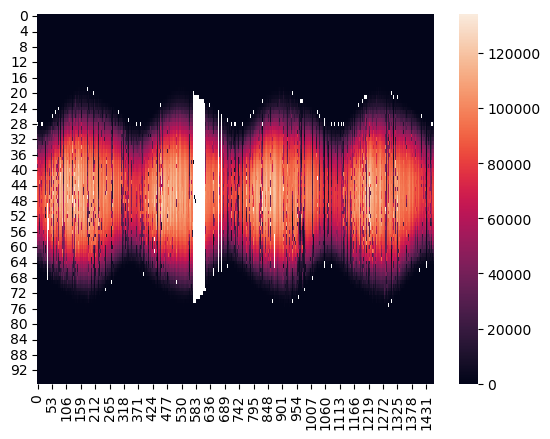

In [56]:
data = np.copy(dh.raw_data_matrix)
msk = dh.daytime_analysis.sunup_mask_estimated
data[~msk] = 0
y = data.ravel(order='F')
sns.heatmap(data)

In [57]:
P1 = int(365*24*4)
P2 = int(24*4)
K = 6
l = 0.1
spq = SmoothPeriodicQuantiles(K, [P1, P2], quantiles=.85, weight=l, take_log=False, verbose=True, solver='osd')
spq

SmoothPeriodicQuantiles(num_harmonics=6, periods=[35040, 96],
                        quantiles=array([0.85]), solver='osd', verbose=True,
                        weight=0.1)

In [58]:
spq.fit(y)

---------------------------------------------------------------
              QSS: the Quadratic-Separable Solver              
                     author: Luke Volpatti                     
---------------------------------------------------------------
initial factorization time:      7.83e+00s
(standard algorithm)

                           ADMM solve                          
---------------------------------------------------------------
 iter | objective | primal res | dual res |   rho   | time (s) 
---------------------------------------------------------------
    1 | 1.14e+03    1.04e+00     1.13e+00   [0.5  0.02]  1.92e-01
   25 | 3.46e+03    4.50e-02     2.10e-02   [0.5  0.02]  5.09e+00
   50 | 3.53e+03    2.60e-02     9.51e-03   [0.5  0.02]  1.03e+01
   75 | 3.55e+03    1.58e-02     5.84e-03   [0.5  0.02]  1.53e+01
  100 | 3.56e+03    1.25e-02     5.08e-03   [0.5  0.02]  2.05e+01
  125 | 3.57e+03    1.26e-02     3.47e-03   [0.5  0.02]  2.56e+01
  150 | 3.57e+03    1.01e-0

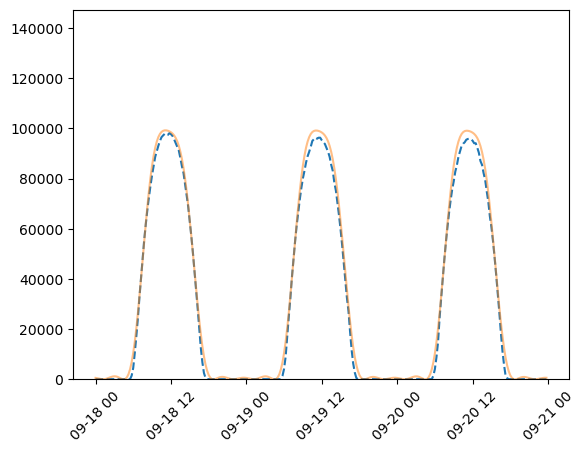

In [59]:
ix = 260
slc = np.s_[24 * 4 * ix:24 * 4 * (ix + 3)]
xs = data_frame.index[slc]
plt.plot(xs, y[slc], ls='--')
plt.plot(xs, spq.fit_quantiles[slc], alpha=0.5)
plt.ylim(-10, np.nanmax(y)*1.1)
plt.xticks(rotation=45);

/var/folders/j_/td27y9gx7rb9hpm_8cdzbzxc5b9m8z/T/ipykernel_71036/1577072111.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(xs, np.log(spq.fit_quantiles[slc]), alpha=0.5)


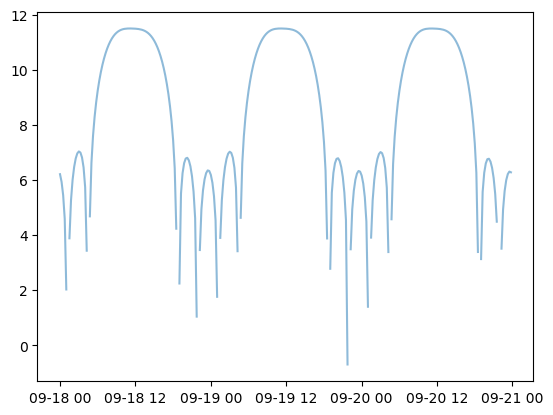

In [60]:
plt.plot(xs, np.log(spq.fit_quantiles[slc]), alpha=0.5)